# :על מה הפרוייקט שלנו
## הדאטה שלנו מכיל מידע כגון: מס' המושבות המייצרות דבש והכמות שנלקחה מהן, תפוקת הדבש למושבה, מחיר לק"ג דבש, מניות, וחומרי הדברה ניאוניים הפוגעים בדבורים 

![](bee2.jpg)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/watch?v=FAYbMDVaAi8" frameborder="0" allowfullscreen></iframe>')

c:\users\yaeld\appdata\local\programs\python\python39\lib\site-packages\IPython\core\display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [3]:
url = 'https://raw.githubusercontent.com/YaelYael123/Project_HoneyNeonic/main/vHoneyNeonic_v03.csv'
HoneyNeonic = pd.read_csv(url)
HoneyNeonic.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year,StateName,Region,FIPS,nCLOTHIANIDIN,nIMIDACLOPRID,nTHIAMETHOXAM,nACETAMIPRID,nTHIACLOPRID,nAllNeonic
0,AL,14000.0,66,924000.0,92000.0,0.81,748000.0,1997,Alabama,South,1,0.0,6704.8,0.0,0.0,0.0,6704.8
1,AL,15000.0,64,960000.0,96000.0,0.87,835000.0,1996,Alabama,South,1,0.0,371.6,0.0,0.0,0.0,371.6
2,AL,16000.0,58,928000.0,28000.0,0.69,640000.0,1995,Alabama,South,1,0.0,716.5,0.0,0.0,0.0,716.5
3,AL,18000.0,50,900000.0,99000.0,0.52,468000.0,1994,Alabama,South,1,NaN,NaN,NaN,NaN,NaN,NaN
4,AL,19000.0,45,855000.0,103000.0,0.59,504000.0,1993,Alabama,South,1,NaN,NaN,NaN,NaN,NaN,NaN


# _____________________________________________________________________________

## טיפול בערכים חסרים

In [4]:
HoneyNeonic.dtypes

state             object
numcol           float64
yieldpercol        int64
totalprod        float64
stocks           float64
priceperlb       float64
prodvalue        float64
year               int64
StateName         object
Region            object
FIPS               int64
nCLOTHIANIDIN    float64
nIMIDACLOPRID    float64
nTHIAMETHOXAM    float64
nACETAMIPRID     float64
nTHIACLOPRID     float64
nAllNeonic       float64
dtype: object

In [5]:
HoneyNeonic.isnull().sum().sort_values(ascending=False)

nAllNeonic       237
nTHIACLOPRID     237
nACETAMIPRID     237
nTHIAMETHOXAM    237
nIMIDACLOPRID    237
nCLOTHIANIDIN    237
Region             0
FIPS               0
state              0
numcol             0
year               0
prodvalue          0
priceperlb         0
stocks             0
totalprod          0
yieldpercol        0
StateName          0
dtype: int64

In [6]:
HoneyNeonic = HoneyNeonic.fillna(0)

In [7]:
#HoneyNeonic.isnull().sum().sort_values(ascending=False)

# _____________________________________________________________________________

## הבנת הדאטה

### ?אז בין מה למה יש קורולציה

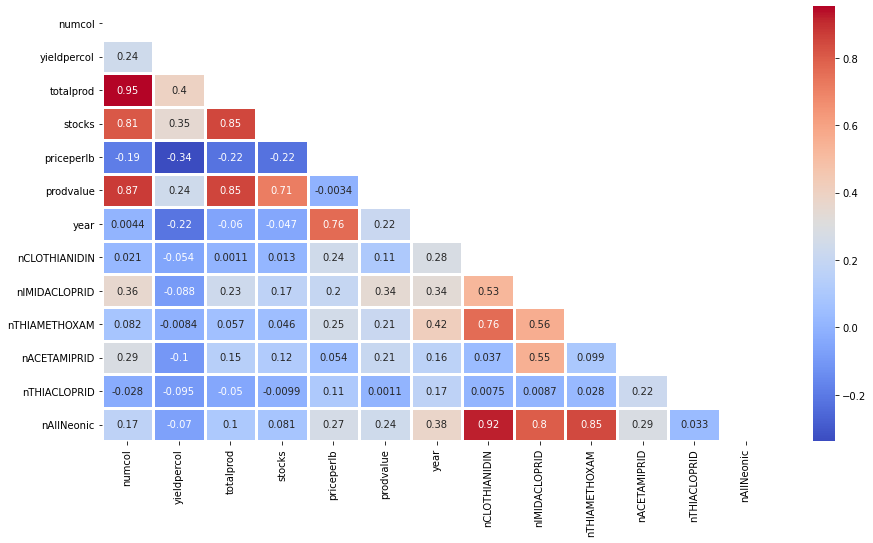

In [8]:
plt.figure(figsize=(15,8))
HoneyNeonic_correlation_matrix = HoneyNeonic[['numcol','yieldpercol','totalprod','stocks','priceperlb','prodvalue','year','nCLOTHIANIDIN','nIMIDACLOPRID','nTHIAMETHOXAM','nACETAMIPRID','nTHIACLOPRID','nAllNeonic']].corr()
matrix = np.triu(HoneyNeonic_correlation_matrix)
sns.heatmap(data=HoneyNeonic_correlation_matrix ,cmap='coolwarm', annot=True, mask=matrix,linewidths=3)
plt.show()

### ישנה קורלציה בין ערך המניות למספר מושבות ותוצרת כללית של הדבש

# ____________________

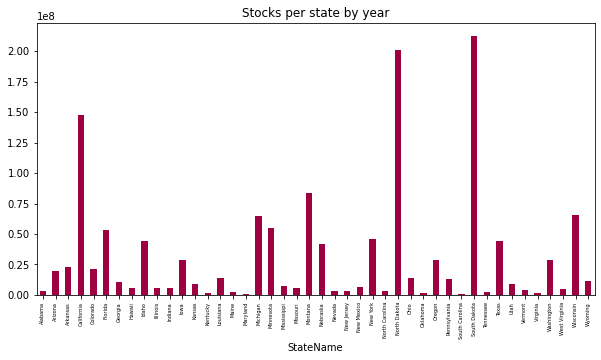

In [90]:
HoneyNeonic.groupby(['StateName'])['stocks'].sum().plot(kind='bar', colormap='Spectral')
plt.title("Stocks per state by year")
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["xtick.labelsize"] = 5
plt.rcParams["ytick.labelsize"] = 10

###  ננסה לבדוק מה קורה בדקותה הצפונית למשל שמשקיעה הרבה בדבש לאורך השנים - ונדגום מספר מדינות לפי איזור

In [10]:
HoneyNeonic['post-neonics(2003)'] = np.where(HoneyNeonic['year']>=2003, 1, 0)

Text(0.5, 1.0, 'North Dakota')

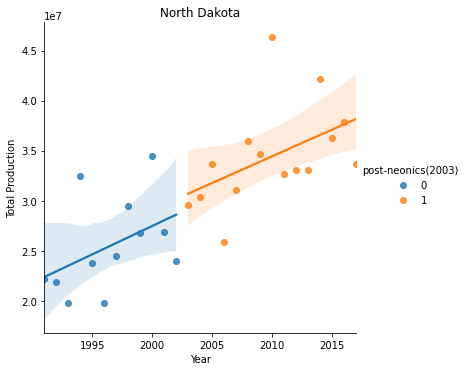

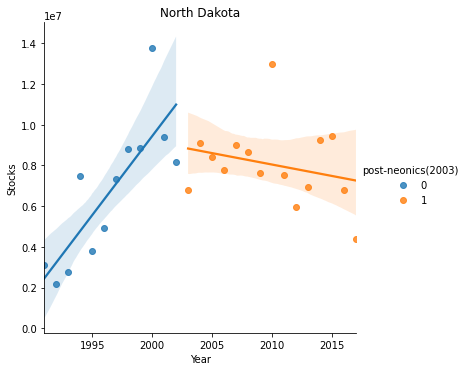

In [34]:
g = sns.lmplot(x="year", y="totalprod", hue="post-neonics(2003)",
               truncate=True, height=5, data=HoneyNeonic[HoneyNeonic.StateName =='North Dakota'])
g.set_axis_labels("Year", "Total Production")
plt.title('North Dakota')

g = sns.lmplot(x="year", y="stocks", hue="post-neonics(2003)",
               truncate=True, height=5, data=HoneyNeonic[HoneyNeonic.StateName =='North Dakota'])
g.set_axis_labels("Year", "Stocks")
plt.title('North Dakota')

### למרות שתפוקת הדבש בעליה ערך המניות יורד
### ננסה לבדוק מה קורה עם ערך המניות לפי איזורים - האם יש מגמת ירידת ערך

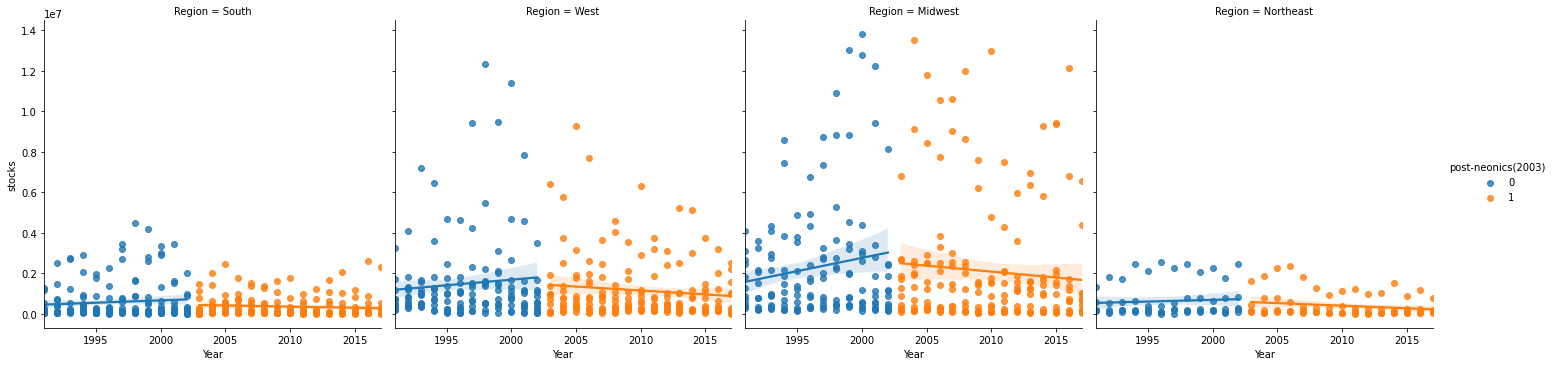

In [33]:
g = sns.lmplot(x="year", y="stocks", hue="post-neonics(2003)",col="Region",
               truncate=True, height=5, data=HoneyNeonic)
g.set_axis_labels("Year", "stocks")

### יש ירידת ערך, נבדוק השפעה על ערך המניות בממוצע

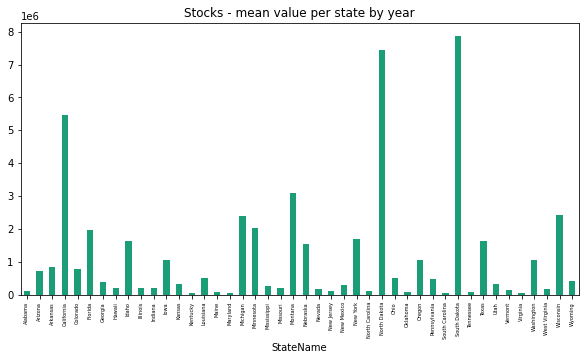

In [69]:
HoneyNeonic.groupby(['StateName'])['stocks'].mean().plot(kind='bar', colormap='Dark2')
plt.title("Stocks - mean value per state by year")
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["xtick.labelsize"] = 5
plt.rcParams["ytick.labelsize"] = 10

### נבדוק השפעה על ערך המניות בממוצע לפני ואחרי השימוש ב

In [17]:
pre_2003 = HoneyNeonic[(HoneyNeonic['year']<2003)]
post_2003 = HoneyNeonic[(HoneyNeonic['year']>=2003)]

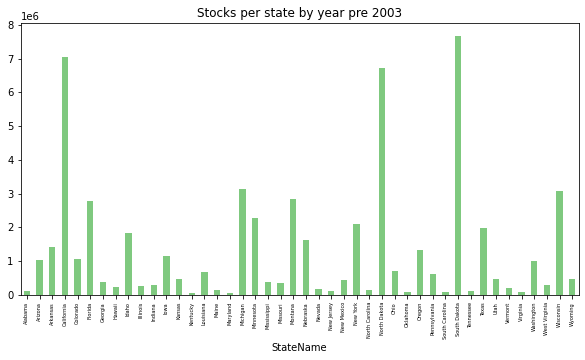

In [70]:
pre_2003.groupby(['StateName'])['stocks'].mean().plot(kind='bar', colormap='Accent')
plt.title("Stocks per state by year pre 2003")
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["xtick.labelsize"] = 5
plt.rcParams["ytick.labelsize"] = 10

### וזה הפרש הממוצעים של ערך ממוצע של המניות "לפני" ו"אחרי" השימוש במדבירים הניאוניים

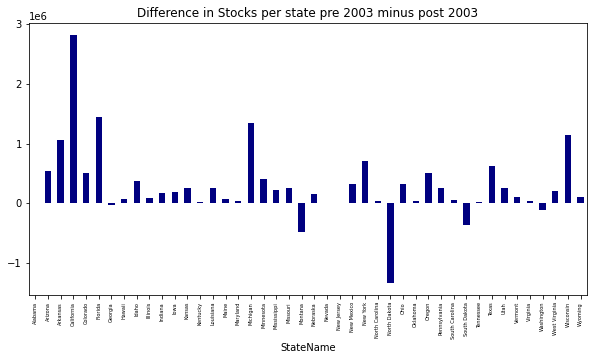

In [91]:
(pre_2003.groupby(['StateName'])['stocks'].mean() - post_2003.groupby(['StateName'])['stocks'].mean()).plot(kind='bar', colormap='gist_ncar')
plt.title("Difference in Stocks per state pre 2003 minus post 2003")
plt.rcParams["figure.figsize"] = (16, 8)
plt.rcParams["xtick.labelsize"] = 10
plt.rcParams["ytick.labelsize"] = 10

### מסקנה 1: ב 3 מדינות היה הפרש שלילי (עלייה) אבל סה"כ ההשפעה הייתה שלילית מה שאומר שלמרות שלא הייתה ירידה של ממש בתפוקות - הייתה השפעה על ההשקעות

# ____________________

### ?האם כמות חומרי ההדברה גורמת לירידה של כמות המושבות והיצור של כל מושבה

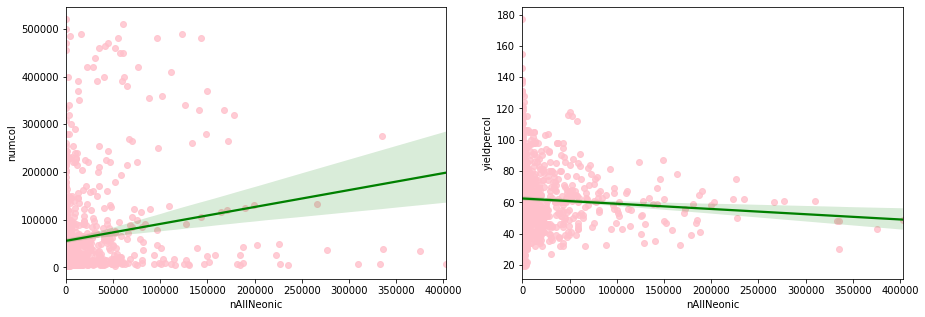

In [80]:
fig, ax = plt.subplots(1,2, figsize = (15,5))
sns.regplot(x='nAllNeonic', y='numcol', data=HoneyNeonic, scatter_kws={"color": "Pink"}, line_kws={"color": "Green"}, ax = ax[0])
sns.regplot(x='nAllNeonic', y='yieldpercol', data=HoneyNeonic, scatter_kws={"color": "Pink"}, line_kws={"color": "Green"}, ax = ax[1])
plt.show()

#### למרות שימוש רב יותר בחומרי הדברה ניאוניים, כמות המושבות עדיין עולה וזאת מכיוון שרוב המדינות שיחזרו מושבות שמתו
#### עם זאת השפעת חומרי ההדברה הייתה משמעותית בכמות היצור של הדבש פר מושבה - גרמה לירידה בתפוקות

## מסקנה 2: תפוקת הדבש לא יורדת עם השנים

# ____________________

### ?האם כמות המושבות עולה למרות השימוש בחומרי ההדברה מה קורה למחיר הדבש

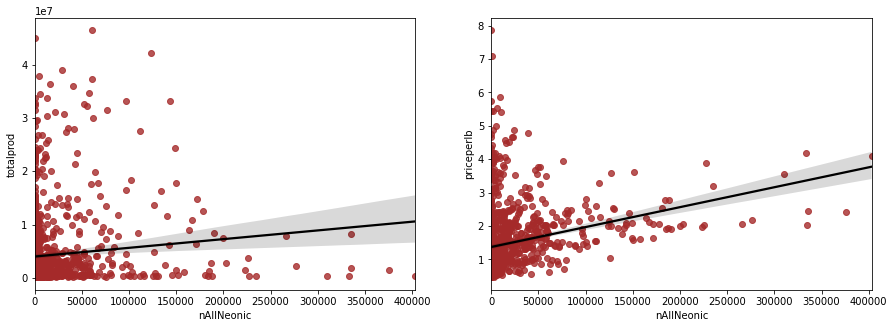

In [86]:
fig, ax = plt.subplots(1,2, figsize = (15,5))
sns.regplot(x='nAllNeonic', y='totalprod', data=HoneyNeonic, scatter_kws={"color": "Brown"}, line_kws={"color": "Black"}, ax = ax[0])
sns.regplot(x='nAllNeonic', y='priceperlb', data=HoneyNeonic, scatter_kws={"color": "Brown"}, line_kws={"color": "Black"}, ax = ax[1])
plt.show()

### נבדוק כמה המחיר של הדבש באמת "מזנק" - לכל השנים של שנדגמו

<AxesSubplot:xlabel='year', ylabel='priceperlb'>

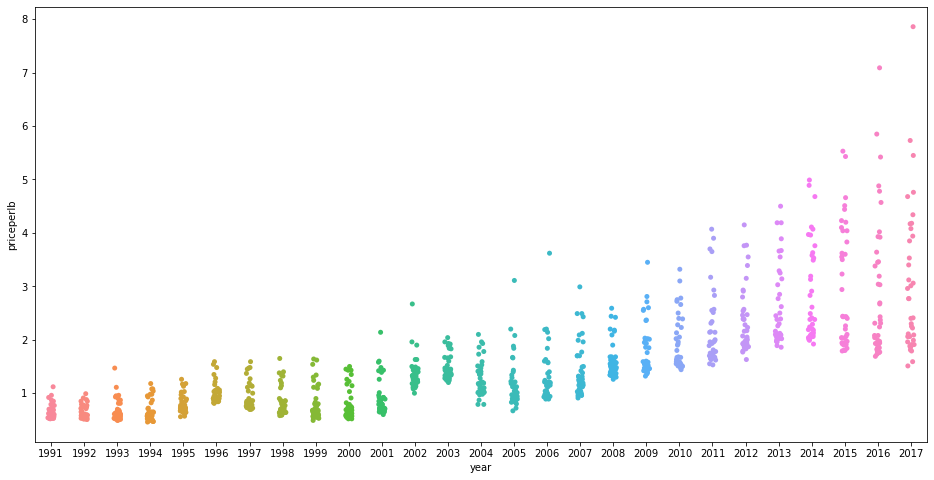

In [53]:
sns.stripplot(x="year", y="priceperlb", data=HoneyNeonic)

#### שימוש בחומרי ההדברה מורידה את כמות היצור פר מושבה, אבל כמות המושבות עולה ולכן ככל שמשתמשים ביותר חומרי הדברה יש צורך ביותר כוורות ובנוסף יש צורך לתחזק כל אחת מהן

## מסקנה 3: מחיר הדבש "זינק" כתוצאה משימוש בחומרי הדברה ניאוניים

# __________________________________________________________________________

# ?הידעת
דבש פרחי בר - מכיל ויטמינים ומינרלים רבים, מאחר שהוא נאסף מזנים שונים של צמחים. צבעו נע בין צהוב-זהב לחום כהה, תלוי בהרכב הצמחים שבו.

דבש אקליפטוס - דבש שצבעו כהה, בעל תכונות אנטי-בקטריאליות ואנטי-זיהומיות. הוא טוב בעיקר לטיפול בבעיות בדרכי הנשימה, בשיעול ובדלקות עור ופה. בדבש אקליפטוס יש ברזל בכמות רבה.

דבש הדרים - דבש עדין במרקמו ובטעמו. צבעו צהבהב והוא מומלץ לבישול ולאפייה. דבש מסוג זה אינו קיים בצורה אורגנית (במדינת ישראל מרססים את כל הפרדסים, ללא יוצא מן הכלל). הוא עוזר להפרעות עיכול ומונע עצירות.

דבש אבוקדו - בעל צבע כהה מאוד ומרקם מאוד סמיך. דבש זה בעל טעם עשיר ומרוכז. הוא מומלץ לבעיות לב ולמחלות מפרקים.

דבש תלתן - מומלץ לטיפול בבעיות בדרכי השתן, בבעיות גינקולוגיות ולטיפול בהזעת יתר.
לאיחוי פצעים, לסינוסיטיס ולטיפול בעצירות.

![](bee.jpg)